# calculations

In [1]:
library(terra)
library(parallel)
library(sf)
library(eurostat)
library(ggplot2)
library(tidyterra)  # Converts terra objects for ggplot


terra 1.8.54

Linking to GEOS 3.12.1, GDAL 3.8.4, PROJ 9.4.0; sf_use_s2() is TRUE


Attaching package: ‘tidyterra’


The following object is masked from ‘package:stats’:

    filter




In [2]:
path <- "../data/in"

In [3]:
df_R0_Cpip_post <- read.csv(file.path("..", "data", "in", "R0_pip_stats.csv"))


In [4]:
summary(df_R0_Cpip_post)

  Temperature      Median_R0           Species         
 Min.   : 0.00   Min.   :0.000e+00   Length:451        
 1st Qu.:11.25   1st Qu.:0.000e+00   Class :character  
 Median :22.50   Median :8.515e-05   Mode  :character  
 Mean   :22.50   Mean   :1.829e-01                     
 3rd Qu.:33.75   3rd Qu.:2.258e-01                     
 Max.   :45.00   Max.   :1.000e+00                     

# load R0 pipiens posterior stats


In [5]:
#temperature values at which statistics where derived
temps <- seq(0, 45, by = 0.1)
temps

[1]  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.0  1.1  1.2  1.3  1.4
 [16]  1.5  1.6  1.7  1.8  1.9  2.0  2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9
 [31]  3.0  3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.0  4.1  4.2  4.3  4.4
 [46]  4.5  4.6  4.7  4.8  4.9  5.0  5.1  5.2  5.3  5.4  5.5  5.6  5.7  5.8  5.9
 [61]  6.0  6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9  7.0  7.1  7.2  7.3  7.4
 [76]  7.5  7.6  7.7  7.8  7.9  8.0  8.1  8.2  8.3  8.4  8.5  8.6  8.7  8.8  8.9
 [91]  9.0  9.1  9.2  9.3  9.4  9.5  9.6  9.7  9.8  9.9 10.0 10.1 10.2 10.3 10.4
[106] 10.5 10.6 10.7 10.8 10.9 11.0 11.1 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9
[121] 12.0 12.1 12.2 12.3 12.4 12.5 12.6 12.7 12.8 12.9 13.0 13.1 13.2 13.3 13.4
[136] 13.5 13.6 13.7 13.8 13.9 14.0 14.1 14.2 14.3 14.4 14.5 14.6 14.7 14.8 14.9
[151] 15.0 15.1 15.2 15.3 15.4 15.5 15.6 15.7 15.8 15.9 16.0 16.1 16.2 16.3 16.4
[166] 16.5 16.6 16.7 16.8 16.9 17.0 17.1 17.2 17.3 17.4 17.5 17.6 17.7 17.8 17.9
[181] 18.0 18.1 18.2 18.3 18.4 18.5 18.6 18.7 18.8 18.9 19.0 19.1 19.2 19.3 19.4
[196] 19.5 19.6 19.7 19.8 19.9 20.0 20.1 20.2 20.3 20.4 20.5 20.6 20.7 20.8 20.9
[211] 21.0 21.1 21.2 21.3 21.4 21.5 21.6 21.7 21.8 21.9 22.0 22.1 22.2 22.3 22.4
[226] 22.5 22.6 22.7 22.8 22.9 23.0 23.1 23.2 23.3 23.4 23.5 23.6 23.7 23.8 23.9
[241] 24.0 24.1 24.2 24.3 24.4 24.5 24.6 24.7 24.8 24.9 25.0 25.1 25.2 25.3 25.4
[256] 25.5 25.6 25.7 25.8 25.9 26.0 26.1 26.2 26.3 26.4 26.5 26.6 26.7 26.8 26.9
[271] 27.0 27.1 27.2 27.3 27.4 27.5 27.6 27.7 27.8 27.9 28.0 28.1 28.2 28.3 28.4
[286] 28.5 28.6 28.7 28.8 28.9 29.0 29.1 29.2 29.3 29.4 29.5 29.6 29.7 29.8 29.9
[301] 30.0 30.1 30.2 30.3 30.4 30.5 30.6 30.7 30.8 30.9 31.0 31.1 31.2 31.3 31.4
[316] 31.5 31.6 31.7 31.8 31.9 32.0 32.1 32.2 32.3 32.4 32.5 32.6 32.7 32.8 32.9
[331] 33.0 33.1 33.2 33.3 33.4 33.5 33.6 33.7 33.8 33.9 34.0 34.1 34.2 34.3 34.4
[346] 34.5 34.6 34.7 34.8 34.9 35.0 35.1 35.2 35.3 35.4 35.5 35.6 35.7 35.8 35.9
[361] 36.0 36.1 36.2 36.3 36.4 36.5 36.6 36.7 36.8 36.9 37.0 37.1 37.2 37.3 37.4
[376] 37.5 37.6 37.7 37.8 37.9 38.0 38.1 38.2 38.3 38.4 38.5 38.6 38.7 38.8 38.9
[391] 39.0 39.1 39.2 39.3 39.4 39.5 39.6 39.7 39.8 39.9 40.0 40.1 40.2 40.3 40.4
[406] 40.5 40.6 40.7 40.8 40.9 41.0 41.1 41.2 41.3 41.4 41.5 41.6 41.7 41.8 41.9
[421] 42.0 42.1 42.2 42.3 42.4 42.5 42.6 42.7 42.8 42.9 43.0 43.1 43.2 43.3 43.4
[436] 43.5 43.6 43.7 43.8 43.9 44.0 44.1 44.2 44.3 44.4 44.5 44.6 44.7 44.8 44.9
[451] 45.0

In [6]:
# Prebuild interpolation function
interp_fun <- approxfun(x = temps, y = df_R0_Cpip_post$Median_R0, 
                        method="linear", 
                        rule = 1)

In [7]:
R0_pip_fun <- function(Tm){
  
  result <- rep(0, length(Tm))
  result[is.na(Tm)] <- NA
  
  valid <- !is.na(Tm) & Tm >= 0 & Tm <= 45
  
  result[valid] <- interp_fun(Tm[valid])
  
  return(result)
}


In [8]:
eu_nuts3 <- get_eurostat_geospatial(resolution = 10,
                                    nuts_level = 3, 
                                    year = 2024) 

Loading required namespace: giscoR

Extracting data using giscoR package, please report issues on https://github.com/rOpenGov/giscoR/issues

Cache management as per giscoR. see 'giscoR::gisco_get_nuts()'



In [9]:
eu_nuts3

ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = 

,id,LEVL_CODE,NUTS_ID,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geo,geometry
,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<lgl>,<chr>,<MULTIPOLYGON [°]>
1,AT127,3,AT127,AT,Wiener Umland/Südteil,Wiener Umland/Südteil,NA,2,NA,NA,AT127,MULTIPOLYGON (((16.04353 48...
2,AT130,3,AT130,AT,Wien,Wien,NA,1,NA,NA,AT130,MULTIPOLYGON (((16.28239 48...
3,AT211,3,AT211,AT,Klagenfurt-Villach,Klagenfurt-Villach,1,2,NA,NA,AT211,MULTIPOLYGON (((13.71419 46...
4,AT212,3,AT212,AT,Oberkärnten,Oberkärnten,1,3,NA,NA,AT212,MULTIPOLYGON (((13.04543 46...
5,AT213,3,AT213,AT,Unterkärnten,Unterkärnten,1,3,NA,NA,AT213,MULTIPOLYGON (((14.01953 46...
6,AT221,3,AT221,AT,Graz,Graz,1,1,NA,NA,AT221,MULTIPOLYGON (((15.05281 47...
7,AT222,3,AT222,AT,Liezen,Liezen,1,3,NA,NA,AT222,MULTIPOLYGON (((13.56961 47...
8,AT223,3,AT223,AT,Östliche Obersteiermark,Östliche Obersteiermark,1,2,NA,NA,AT223,MULTIPOLYGON (((14.62066 47...
9,AT224,3,AT224,AT,Oststeiermark,Oststeiermark,1,3,NA,NA,AT224,MULTIPOLYGON (((15.78384 47...


In [10]:
out_data = file.path("..", "data", "out")

# tests 

In [11]:
year = 2024 
month = 8
target_file <- paste0("ERA5land_global_t2m_dailyStats_mean_01Deg_",
                        year,
                        "_",
                        sprintf("%02d", month),
                        "_data.nc")
target_file <- file.path(path, target_file)


In [12]:
r_tmp = terra::rast(target_file)


In [13]:
r_tmp

class       : SpatRaster 
size        : 1801, 3600, 31  (nrow, ncol, nlyr)
resolution  : 0.1, 0.1  (x, y)
extent      : -179.95, 180.05, -90.05, 90.05  (xmin, xmax, ymin, ymax)
coord. ref. : lon/lat WGS 84 (CRS84) (OGC:CRS84) 
source      : ERA5land_global_t2m_dailyStats_mean_01Deg_2024_08_data.nc 
varname     : t2m (2 metre temperature) 
names       : t2m_v~ime=0, t2m_v~ime=1, t2m_v~ime=2, t2m_v~ime=3, t2m_v~ime=4, t2m_v~ime=5, ... 
unit        : C 
depth       : 0 to 30 (valid_time [days since 2024-08-01]: 31 steps) 

# main code

In [14]:
cl <- makeCluster(16)  
# export relevant functions to cluster
clusterExport(cl, 
              list("df_R0_Cpip_post",
                   "R0_pip_fun", 
                   "interp_fun"
)) 
r_R0 <- NULL
map_uncropped <- NULL
map_cropped <- NULL

for(year in 2024:2024){
  
  for(month in 8:8){
    target_file <- paste0("ERA5land_global_t2m_dailyStats_mean_01Deg_",
                          year,
                          "_",
                          sprintf("%02d", month),
                          "_data.nc")
    print(paste("month:", sprintf("%02d", month)))
    target_file <- file.path(path, target_file)
    # # create spatRaster object
    r_tmp = terra::rast(target_file)
    map_uncropped <<- r_tmp
    
    # crop to Europe extent
    r_tmp <- terra::crop(r_tmp, eu_nuts3)
    map_cropped <<- r_tmp 

    
    # apply R0 transformation
    r_R0 <<- app(r_tmp, 
              fun = R0_pip_fun,
              cores = cl)
    
    # # save output
    output_filename = paste0("R0_pip_posterior_median_europe_", year,"_", 
                             sprintf("%02d", month), ".tif")
    output_filename <- file.path(out_data, output_filename)
    writeRaster(r_R0, filename = output_filename,
                overwrite = TRUE)
    
    # print(paste(year,month))
    print(paste('target_file', target_file))
    print(paste('output_file', output_filename))
  }
}
stopCluster(cl)

[1] "month: 08"
[1] "target_file ../data/in/ERA5land_global_t2m_dailyStats_mean_01Deg_2024_08_data.nc"
[1] "output_file ../data/out/R0_pip_posterior_median_europe_2024_08.tif"


# visualize some of the stuff here

In [15]:
r_R0

class       : SpatRaster 
size        : 1021, 1189, 31  (nrow, ncol, nlyr)
resolution  : 0.1, 0.1  (x, y)
extent      : -63.05, 55.85, -21.35, 80.75  (xmin, xmax, ymin, ymax)
coord. ref. : lon/lat WGS 84 (CRS84) (OGC:CRS84) 
source(s)   : memory
names       :     lyr.1, lyr.2,     lyr.3, lyr.4,     lyr.5,     lyr.6, ... 
min values  : 0.0000000,     0, 0.0000000,     0, 0.0000000, 0.0000000, ... 
max values  : 0.9999998,     1, 0.9999998,     1, 0.9999993, 0.9999996, ... 

In [16]:
nlyr(r_R0) # n layers in the raster

[1] 31

<SpatRaster> resampled to 501000 cells.


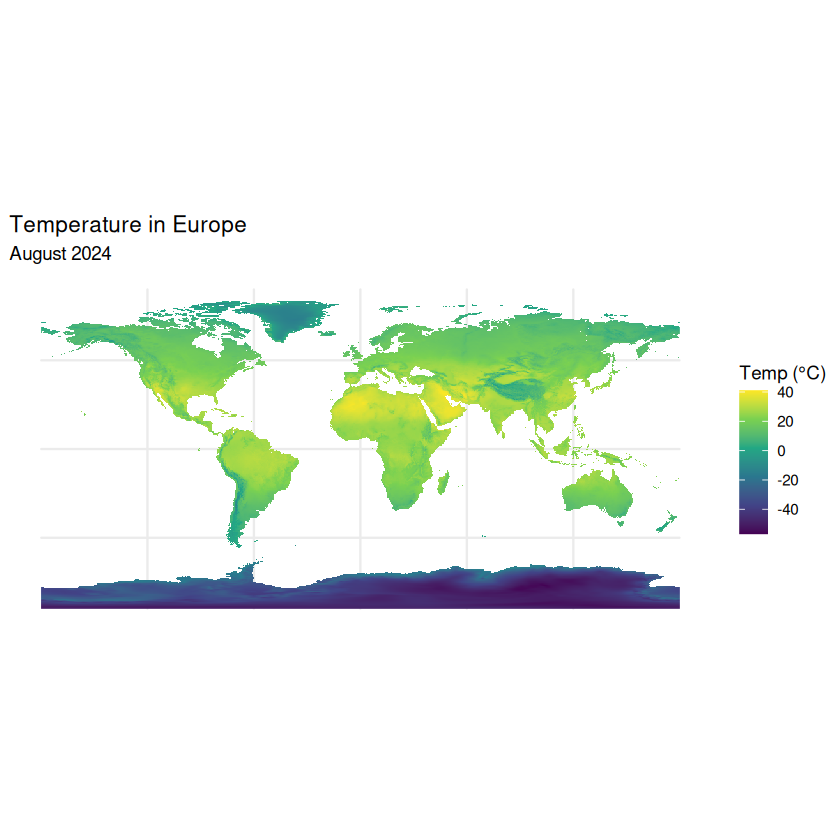

In [17]:
map_uncropped_mean <- app(map_uncropped, fun = mean, na.rm = TRUE)

ggplot() +
  geom_spatraster(data = map_uncropped_mean) +
  scale_fill_viridis_c(name = "Temp (°C)", na.value = "transparent") +
  labs(title = "Temperature in Europe",
       subtitle = "August 2024") +
  theme_minimal()

<SpatRaster> resampled to 501184 cells.


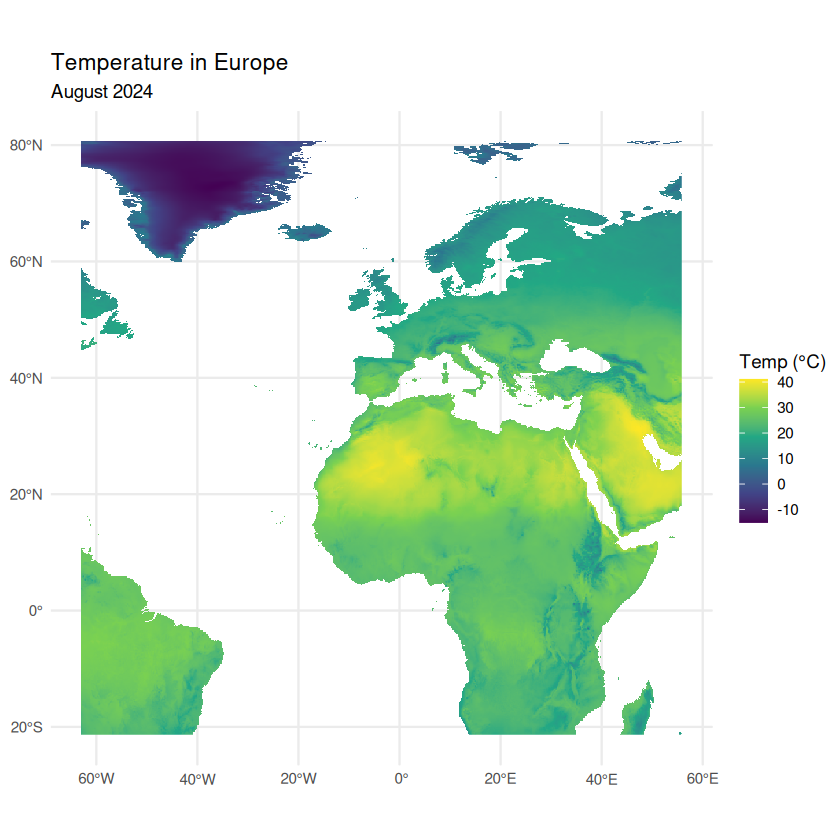

In [18]:
map_cropped_mean <- app(map_cropped, fun = mean, na.rm = TRUE)

ggplot() +
  geom_spatraster(data = map_cropped_mean) +
  scale_fill_viridis_c(name = "Temp (°C)", na.value = "transparent") +
  labs(title = "Temperature in Europe",
       subtitle = "August 2024") +
  theme_minimal()

<SpatRaster> resampled to 501184 cells.


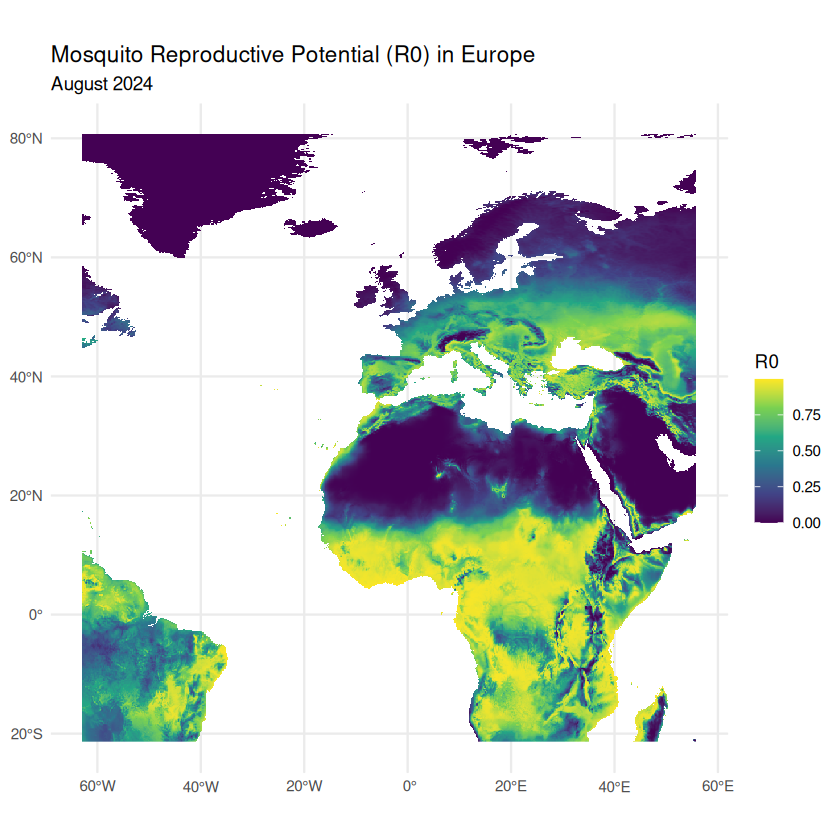

In [19]:
r_R0_mean <- app(r_R0, fun = mean, na.rm = FALSE) # this does something werid, the values that come out should be normalized

ggplot() +
  geom_spatraster(data = r_R0_mean) +
  scale_fill_viridis_c(name = "R0", na.value = "transparent") +
  labs(title = "Mosquito Reproductive Potential (R0) in Europe",
       subtitle = "August 2024") +
  theme_minimal()

this seesms to be wrongly normalized. the crops are different, too